# MODIS AOD Parser

In [3]:
import tables
import h5py
import numpy as np
import sys
from pyhdf.SD import SD, SDC
import pandas as pd
import time
import calendar
import matplotlib.pyplot as plt

import datetime
import os

## Intermediate File Parsing

**Sample File:** Raw MODIS AOD 2012, Days 1 through 183

In [2]:
year = 2012
half = 1
init = np.empty((0, 4))
files_list = os.listdir(f"modis_aod/{year}")
print((int)(len(files_list) / 2))
if half == 1:
  files_list = files_list[:(int)(len(files_list) / 2)]
else:
  files_list = files_list[(int)(len(files_list) / 2):]
counter = 0
exec(f"list_temp_{year}_{half} = []")

for file in files_list:
    try:
        file_parse = SD(f"modis_aod/{year}/{file}")
    except:
        print(f"{file} unable to be opened.")
        continue
    # print(file)
    times = np.array(file_parse.select("Scan_Start_Time")[:])
    latitudes = np.array(file_parse.select("Latitude")[:])
    longitudes = np.array(file_parse.select("Longitude")[:])
    aod =  np.array(file_parse.select("Optical_Depth_Land_And_Ocean")[:])
    arr_temp = np.array([times.flatten(), latitudes.flatten(), longitudes.flatten(), aod.flatten()]).T
    exec(f"list_temp_{year}_{half}.append(arr_temp)")
    counter+=1
    print(counter)

576
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [3]:
exec(f"stacked_{year}_{half} = np.vstack(list_temp_{year}_{half})")

In [4]:
exec(f"pd_stacked_{year}_{half} = pd.DataFrame(stacked_{year}_{half})")

In [5]:
exec(f"pd_stacked_{year}_{half}.to_hdf('modis_aod/modis_aod_yearly/aod_{year}_{half}.h5', key='df')")

## Final Processing

**Sample Files:** Parsed MODIS AOD 2012

In [13]:
year = 2012
exec(f"a_{year} = pd.read_hdf('modis_aod/modis_aod_yearly/aod_{year}_1.h5')")
exec(f"b_{year} = pd.read_hdf('modis_aod/modis_aod_yearly/aod_{year}_2.h5')")

In [14]:
exec(f"final_{year} = pd.concat([a_{year}, b_{year}], ignore_index = True)")
exec(f"final_{year} = final_{year}[final_{year}[3] != -9999.0]")
exec(f"final_{year} = final_{year}[(final_{year}[1] < 42) & (final_{year}[1] > 36) & (final_{year}[2] > -124.5) & (final_{year}[2] < -118.5)]")

In [15]:
exec(f"final_{year}.shape")

In [16]:
exec(f"days_{year} = get_dates_list({year})")
exec(f"regridded_{year} = []")

for day in days_2012:
    print(day)
    regridded_2012.append(regrid_aod_average(final_2012, timestr_to_nsecs(day), -9999.0))

1-1-2012
(5030, 4)
1-2-2012
(15, 4)
1-3-2012
(0, 4)
1-4-2012
(7611, 4)
1-5-2012
(9571, 4)
1-6-2012
(1743, 4)
1-7-2012
(10454, 4)
1-8-2012
(2300, 4)
1-9-2012
(17205, 4)
1-10-2012
(1497, 4)
1-11-2012
(7177, 4)
1-12-2012
(7493, 4)
1-13-2012
(6319, 4)
1-14-2012
(10457, 4)
1-15-2012
(1228, 4)
1-16-2012
(11971, 4)
1-17-2012
(1485, 4)
1-18-2012
(2132, 4)
1-19-2012
(0, 4)
1-20-2012
(0, 4)
1-21-2012
(4042, 4)
1-22-2012
(132, 4)
1-23-2012
(4221, 4)
1-24-2012
(190, 4)
1-25-2012
(5384, 4)
1-26-2012
(231, 4)
1-27-2012
(7098, 4)
1-28-2012
(6488, 4)
1-29-2012
(1389, 4)
1-30-2012
(3008, 4)
1-31-2012
(1185, 4)
2-1-2012
(2455, 4)
2-2-2012
(3326, 4)
2-3-2012
(5605, 4)
2-4-2012
(6951, 4)
2-5-2012
(4069, 4)
2-6-2012
(578, 4)
2-7-2012
(205, 4)
2-8-2012
(12840, 4)
2-9-2012
(5697, 4)
2-10-2012
(4645, 4)
2-11-2012
(688, 4)
2-12-2012
(3573, 4)
2-13-2012
(523, 4)
2-14-2012
(2025, 4)
2-15-2012
(12222, 4)
2-16-2012
(3540, 4)
2-17-2012
(8340, 4)
2-18-2012
(969, 4)
2-19-2012
(5874, 4)
2-20-2012
(604, 4)
2-21-2012
(8

In [17]:
exec(f"regridded_{year}_df = pd.DataFrame(regridded_{year})")

In [19]:
exec(f"regridded_{year}_df.to_hdf('modis_aod/modis_aod_regridded/regridded_{year}.h5', key='df')")

## Mapping Exploration

In [17]:
test_regridded = pd.read_hdf("modis_aod/modis_aod_regridded/regridded_2018.h5")

In [18]:
test_regridded = np.array(test_regridded)

In [30]:
test_day = test_regridded[275].reshape(120, 120)

In [31]:
test_day

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

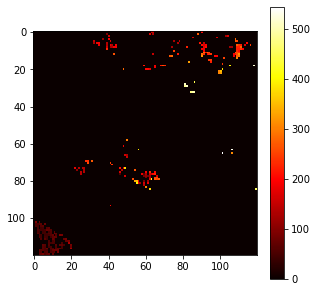

In [32]:
fig, ax = plt.subplots(figsize = (5,5))
test_map = ax.imshow(test_day, cmap="hot", interpolation="none")
cbar = fig.colorbar(test_map, ax=ax)

## Final Processing Functions

In [10]:
def get_dates_list(year):
    dates = []
    if year == 2016 or year == 2012:
        n = 367
    else:
        n = 366
    for d in range(1, n):
        day = datetime.datetime(year, 1, 1) + datetime.timedelta(d - 1)
        dates.append(day.strftime("%-m-%-d-%Y"))
    return dates

In [11]:
## From Wisconsin Horizontal Interpolation Program for Satellites package
def nsecs_to_timestr(nSecsSinceEpoch,
                     epoch='01-01-1993',
                     format='%m-%d-%Y'):
    '''
    Convert the number of seconds since a specified epoch
    to a human-readable time string.
    
    Defaults to converting out of Unix time
    
    Inputs:
        nSecsSinceEpoch - number of seconds since specified epoch
        epoch - a string in the style of format representing epoch time
        format - a format string to convert into as in time.strptime
        
    Outputs:
        string - Human readable time string
    '''
    tStructAtEpoch = time.strptime(epoch, format)
    nSecsAtEpoch = calendar.timegm(tStructAtEpoch)
    nSecsUnix = nSecsSinceEpoch + nSecsAtEpoch
    tStructUnix = time.gmtime(nSecsUnix)
    return time.strftime(format, tStructUnix)

def timestr_to_nsecs(timestr, 
                     epoch='01-01-1993', 
                     format='%m-%d-%Y'):
    '''
    Convert a given string to the number of seconds
    since a specified epoch.
    
    Defaults to converting into Unix time
    
    Inputs:
        timestr - a string representing the time to convert
        epoch - a string representing desired epoch time
        format - a format string as in time.strptime used for timestr and epoch
        
    Outputs: 
        double - number of seconds since epoch
    '''
    desStructTime = time.strptime(timestr, format)
    epochStructTime = time.strptime(epoch, format)
    desUnixTime = calendar.timegm(desStructTime)
    epochUnixTime = calendar.timegm(epochStructTime)
    return desUnixTime - epochUnixTime

In [12]:
def regrid_aod_average(df, day, fillVal):
    measurements = df[(df[0] > day) & (df[0] < day + 86400)]
    print(measurements.shape)
    grid = [[[] for i in range(120)] for j in range(120)]
    for i in range(measurements.shape[0]):
        latidx = int((42 - measurements.iloc[i][1]) / 0.05)
        lonidx = int((measurements.iloc[i][2] + 124.5) / 0.05)
        if (0 <= latidx <= 120) & (0 <= lonidx <= 120):
            measurement = measurements.iloc[i][3]
            if (measurement != fillVal):
                grid[latidx][lonidx].append(measurements.iloc[i][3])

    final_grid = np.zeros((120, 120))

    for i in range(120):
        for j in range(120):
            if len(grid[i][j]) != 0:
                final_grid[i, j] = sum(grid[i][j]) / len(grid[i][j])


    return final_grid.reshape(120*120)